In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

# 確認問題

## 1. 単回帰

以下のデータ$\mathcal{D}_s$に対して単回帰分析を行うプログラムを実装せよ．

In [2]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
X = D[:,0]
Y = D[:,1]

なお，NumPy, SciPy, scikit-learnには回帰分析を行う便利な関数として以下のようなものがあるが，ここでは使わずに講義中で説明した式をプログラムとして表現すること．

+ [np.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), [np.polynomial.polynomial.Polynomial.fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit)
+ [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html), [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
+ [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### 1. (1) 単回帰の実装

$\mathcal{D}_s$に対して単回帰を行い，回帰直線の係数$a$と$b$の値を求めよ

In [3]:
# sklearn準拠モデルによる自作単回帰
class myLinerRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, Y):
        X_ = X.mean()
        Y_ = Y.mean()
        CovXY = ((X-X_)*(Y-Y_)).mean()
        VarX = ((X-X_)**2).mean() 
        self.coef_ = CovXY/VarX
        self.intercept_ = Y_-self.coef_*X_
        return self
    def predict(self, X):
        return X*self.coef_+self.intercept_

In [4]:
myreg = myLinerRegression()
myreg.fit(X,Y)
pred_Y = myreg.predict(X)
print(f'a: {myreg.coef_:1.3f}')
print(f'b: {myreg.intercept_:1.3f}')

a: 0.431
b: 3.310


### 1. (2) 回帰直線の描画

単回帰で求めた回帰直線をデータ点とともにグラフに描け

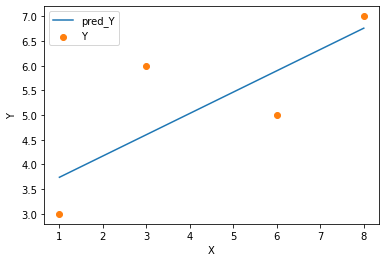

In [5]:
plt.plot(X, pred_Y, label='pred_Y')
plt.scatter(X, Y, label='Y', c='C1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 1. (3) 残差の計算


各事例$(x_i, y_i)$に対して残差$\hat{\epsilon}_i$を求めよ

In [6]:
err = Y-pred_Y
for i, err in enumerate(err):
    print(f'ε{i} = {err:1.3f}')

ε0 = -0.741
ε1 = 1.397
ε2 = -0.897
ε3 = 0.241


### 1. (4) 説明変数と残差の共分散

説明変数と残差の共分散を求めよ

In [7]:
Cov=lambda x,y: ((x-x.mean())*(y-y.mean())).mean()
Cov(X, err)

0.0

### 1. (5) 目的変数の推定値と残差の共分散

目的変数の推定値と残差の共分散を求めよ

In [8]:
Cov(pred_Y, err)

0.0

### 1. (6) 決定係数

決定係数（$R^2$）を求めよ

In [9]:
Var = lambda x: ((x-x.mean())**2).mean() 
calc_R2 = lambda pred_y,y: Var(pred_y)/Var(y)
calc_R2(pred_Y, Y)

0.6157635467980295

In [10]:
# myLinerRegression.scoreによる確認
myreg.score(X, Y)

0.6157635467980296

## 2. 重回帰

データ$\mathcal{D}_s$に対して多項式のフィッティングを行いたい．以下の処理を行うプログラムを作成せよ．

In [11]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])

なお，NumPy, SciPy, scikit-learnには回帰分析を行う便利な関数として以下のようなものがあるが，ここでは使わずに講義中で説明した式をプログラムとして表現すること．

+ [np.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), [np.polynomial.polynomial.Polynomial.fit](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.fit.html#numpy.polynomial.polynomial.Polynomial.fit)
+ [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html), [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), [scipy.stats.linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)
+ [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

### 2. (1) ２次関数による重回帰

$y = w_0 + w_1 x + w_2 x^2$とおき，重回帰により平均二乗残差を最小にする$\pmb{w} = \begin{pmatrix}
w_0 \\
w_1 \\
w_2
\end{pmatrix}$を求めよ．

In [12]:
def make_ndim_design_matrix(x,n):
    X  = np.ones_like(x)
    for i in range(1,n+1):
        X = np.vstack([X, x**i])
    return X.T

In [13]:
x = D[:,0]
X = make_ndim_design_matrix(x,2)
Y = D[:,1]

In [14]:
# sklearn準拠モデルによる自作単回帰
class myMultiLinerRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        self.w_ = np.linalg.inv(X.T @ X) @ X.T @ y
        return self
    def predict(self, X):
        return X @ self.w_

In [15]:
mymultireg = myMultiLinerRegression()
mymultireg.fit(X,Y)
pred_Y = mymultireg.predict(X)
print(f'w: {mymultireg.w_}')

w: [ 2.66034483  0.88103448 -0.05      ]


In [16]:
# sklearnの値による確認
LinearRegression(fit_intercept=False).fit(X, Y).coef_

array([ 2.66034483,  0.88103448, -0.05      ])

### 2. (2) 回帰曲線の描画

回帰で求めた2次関数をデータ点とともにグラフに描け．

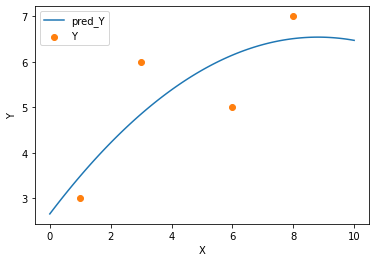

In [17]:
x_pl = np.linspace(0,10,100)
X_pl = make_ndim_design_matrix(x_pl,2)

plt.plot(x_pl, mymultireg.predict(X_pl), label='pred_Y')
plt.scatter(x, Y, label='Y', c='C1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 2. (3) 決定係数

回帰で得られた2次関数の決定係数（$R^2$）を求めよ．

In [18]:
calc_R2(pred_Y, Y)

0.6443349753694654

In [19]:
# myMultiLinerRegression.scoreによる確認
mymultireg.score(X, Y)

0.6443349753694585

### 2. (4) 3次関数による重回帰

$y = w_0 + w_1 x + w_2 x^2 + w_3 x^3$とおき，重回帰により平均二乗残差を最小にする$\pmb{w} = \begin{pmatrix}
w_0 \\
w_1 \\
w_2 \\
w_3
\end{pmatrix}$を求めよ．

In [20]:
x = D[:,0]
X = make_ndim_design_matrix(x,3)
Y = D[:,1]

In [21]:
mymultireg = myMultiLinerRegression()
mymultireg.fit(X,Y)
pred_Y = mymultireg.predict(X)
print(f'w: {mymultireg.w_}')

w: [-1.22857143  5.40952381 -1.27142857  0.09047619]


In [22]:
# sklearnの値による確認
LinearRegression(fit_intercept=False).fit(X, Y).coef_

array([-1.22857143,  5.40952381, -1.27142857,  0.09047619])

### 2. (5) 回帰曲線の描画

回帰で求めた3次関数をデータ点とともにグラフに描け

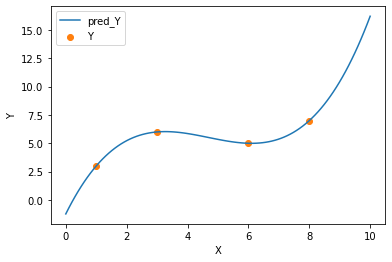

In [23]:
x_pl = np.linspace(0,10,100)
X_pl = make_ndim_design_matrix(x_pl,3)

plt.plot(x_pl, mymultireg.predict(X_pl), label='pred_Y')
plt.scatter(x, Y, label='Y', c='C1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 2. (6) 決定係数

回帰で求めた3次関数の決定係数（$R^2$）を求めよ

In [24]:
# 誤差が乗ってる
calc_R2(pred_Y, Y)

1.000000000000119

## 3. モデル選択と正則化

### 3. (1) 9次関数によるリッジ回帰

例として用いてきた以下の学習データ`X`, `Y`に対してリッジ回帰を行い，回帰曲線をプロットせよ．
ただし，正則化のハイパーパラメータは$\alpha = 10^{-9}, 10^{-6}, 10^{-3}, 1$の4通りを試し，すべての回帰曲線と学習データの各点を一つのグラフ上にプロットせよ．

In [25]:
x = np.array([ 0.  ,  0.11,  0.25,  0.29,  0.41,  0.42,  0.43,  0.8 ,  0.81, 1.  ])
X = make_ndim_design_matrix(x,9)
Y = np.array([ 0.04,  0.75,  1.  ,  0.99,  0.31,  0.52,  0.38, -0.99, -1.05, 0.  ])

なお，scikit-learnにはリッジ回帰を行う便利なクラス[sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)があるが，ここでは使わずに講義中で説明した式をプログラムとして表現すること．

In [26]:
# sklearn準拠モデルによる自作単回帰
class myRidgeRegression(BaseEstimator, RegressorMixin):
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
    def fit(self, X, y):
        self.w_ = np.linalg.inv(X.T @ X + self.alpha*np.eye(X.shape[0])) @ X.T @ y
        return self
    def predict(self, X):
        return X @ self.w_

In [27]:
myridge=myRidgeRegression(alpha=1e-9)
myridge.fit(X,Y)

myRidgeRegression(alpha=1e-09)

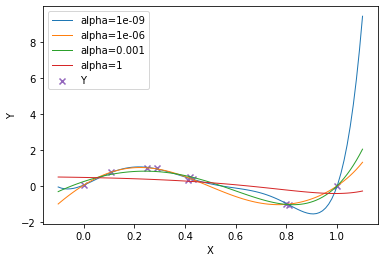

In [28]:
x_pl = np.linspace(-0.1,1.1,100)
X_pl = make_ndim_design_matrix(x_pl,9)

alphas=[1e-9, 1e-6, 1e-3, 1]
models={}
for alpha in alphas:
    myridge=myRidgeRegression(alpha=alpha)
    myridge.fit(X,Y)
    models[alpha]=myridge
    plt.plot(x_pl, myridge.predict(X_pl), label=f'alpha={alpha:}', linewidth=1)
plt.scatter(x, Y, label='Y', marker='x', c='C4')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### 3. (2) パラメータの$L_2$ノルム

学習した4つのモデルのパラメータの$L_2$ノルムを計算し，表示せよ．

In [29]:
cal_L2 =  lambda w: w @ w

for alpha in alphas:
    myridge=models[alpha]
    w = myridge.w_
    print(f'alpha = {alpha:1.0e}: |W|_2^2 = {cal_L2(w):.3f}')

alpha = 1e-09: |W|_2^2 = 255564.745
alpha = 1e-06: |W|_2^2 = 1332.359
alpha = 1e-03: |W|_2^2 = 126.332
alpha = 1e+00: |W|_2^2 = 0.697


### 3. (3) 検証データに基づく$\alpha$の選択

例として用いてきた以下の検証データ`X_valid`, `Y_valid`に対して，これまでに学習した4つのモデルの平均二乗残差（MSR）を計算し，正則化のハイパーパラメータとして最も汎化性能が高いと考えられるものがどれか，報告せよ．計算結果を示した上で「○○なので$\alpha = \dots$のモデルがよい」と回答すれば十分である．

In [30]:
x_valid = np.array([ 0.05,  0.08,  0.12,  0.16,  0.28,  0.44,  0.47,  0.55,  0.63,  0.99])
X_valid = make_ndim_design_matrix(x_valid,9)
Y_valid = np.array([ 0.35,  0.58,  0.68,  0.87,  0.83,  0.45,  0.01, -0.36, -0.83, -0.06])

In [31]:
cal_MSE =  lambda pred_y, y: np.mean((pred_y-y)**2)
for alpha in alphas:
    myridge = models[alpha]
    pred_Y = myridge.predict(X_valid)
    print(f'alpha = {alpha:1.0e}: MSE = {cal_MSE(pred_Y, Y_valid):.3f}')

alpha = 1e-09: MSE = 0.073
alpha = 1e-06: MSE = 0.010
alpha = 1e-03: MSE = 0.040
alpha = 1e+00: MSE = 0.170


ここで，検証データについて$\mathrm{MSE}=0.01$が最小なので$\alpha=10^{-6}$のときのモデルが良い

## 4. 勾配法

以下のデータ$\mathcal{D}_s$について，確率的勾配降下法で単回帰を行い，パラメータを推定せよ．ここでも、便利なモジュール等は使わずに、講義中で説明した式・アルゴリズムをプログラムとして表現すること．

In [32]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
x = D[:,0]
X = make_ndim_design_matrix(x,1)
Y = D[:,1]

In [33]:
# sklearn準拠モデルによる自作単回帰
class mySGDRegression(BaseEstimator, RegressorMixin):
    def __init__(self, eta = 1.0, max_iter = 1000):
        self.eta = eta
        self.max_iter = max_iter
    def fit(self, X, y):
        delta_l = lambda x,y,w: 2 * (x @ w - y) * x.T
        s,n = X.shape
        w = np.ones(n)
        for i in range(self.max_iter):
            idx_rand = np.random.randint(s)
            x_rand = X[idx_rand]
            y_rand = Y[idx_rand]
            w = w - self.eta * delta_l(x_rand, y_rand, w)
        self.w_ = w
        return self
    def predict(self, X):
        return X @ self.w_

In [34]:
mysgdreg=mySGDRegression(eta = 1e-3, max_iter=10000)
mysgdreg.fit(X,Y)
pred_Y = mysgdreg.predict(X)
print(f'w: {mysgdreg.w_}')

w: [3.3119723  0.47712324]


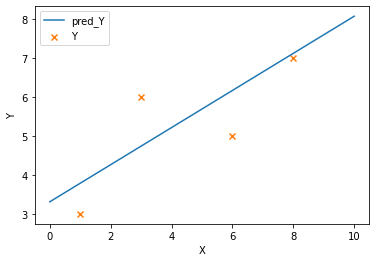

In [35]:
x_pl = np.linspace(0,10,100)
X_pl = make_ndim_design_matrix(x_pl,1)

plt.plot(x_pl, mysgdreg.predict(X_pl), label='pred_Y')
plt.scatter(x, Y, label='Y', marker='x', c='C1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()